In [1]:
#importing some required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
#reading the data set
df = pd.read_csv('car_data.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Fuel_efficiency,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,28.0,02-02-2012,58.280150,18,8,307.0,3504,12.0,70,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,25.0,06-03-2011,91.370778,15,8,350.0,3693,11.5,70,1
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,...,26.0,01-04-2012,NaN,18,8,318.0,3436,11.0,70,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,22.0,03-10-2011,91.389779,16,8,304.0,3433,12.0,70,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,27.0,10-08-2011,62.777639,17,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,...,25.0,9/21/2011,66.498812,19,6,225.0,3264,16.0,75,1
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,...,25.0,11/24/2012,70.654495,18,6,250.0,3459,16.0,75,1
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,...,25.0,6/25/2011,71.155978,15,6,250.0,3432,21.0,75,1
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,...,23.0,4/26/2011,101.623357,15,6,250.0,3158,19.5,75,1


In [3]:
#checking the columns that our dataset contains
df.columns 

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'mpg',
       'cylinders', 'displacement', 'weight', 'acceleration', 'model year',
       'origin'],
      dtype='object')

In [4]:
#manfacturer , model,sales,price,origin,resale value,model year,fuel effeciency,vechicle type and some of the columns are not necessary.Therefore we shall drop them

df=df.drop(["Manufacturer","Model","Sales_in_thousands","origin","Power_perf_factor","__year_resale_value","Vehicle_type","Price_in_thousands","Engine_size","Wheelbase","Width","Length","Fuel_efficiency","Horsepower","Latest_Launch","Curb_weight","Fuel_capacity","model year"],axis=1)

In [5]:
#we can clearly observe that,In our selected attributes there are no null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
dtype: int64

In [6]:
#Now change the mpg and weight into float type for our convinient
df["mpg"]=df["mpg"].astype(float)
df["weight"]=df["weight"].astype(float)

In [7]:
df

,mpg,cylinders,displacement,weight,acceleration
0,18.0,8,307.0,3504.0,12.0
1,15.0,8,350.0,3693.0,11.5
2,18.0,8,318.0,3436.0,11.0
3,16.0,8,304.0,3433.0,12.0
4,17.0,8,302.0,3449.0,10.5
...,...,...,...,...,...
152,19.0,6,225.0,3264.0,16.0
153,18.0,6,250.0,3459.0,16.0
154,15.0,6,250.0,3432.0,21.0
155,15.0,6,250.0,3158.0,19.5


Checking the relationship of attributes with milege

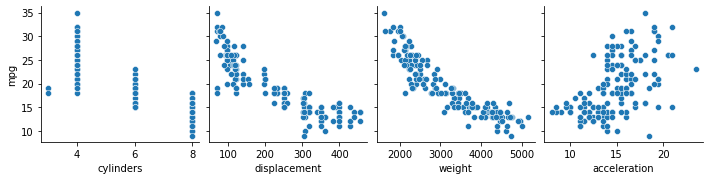

In [8]:
#we can say that,our selected attributes all are related with milege
#weight and displacement are more releated with milege

sns.pairplot(df, x_vars=df.drop(["mpg"], 
             axis=1, inplace=False).columns, y_vars= ["mpg"])

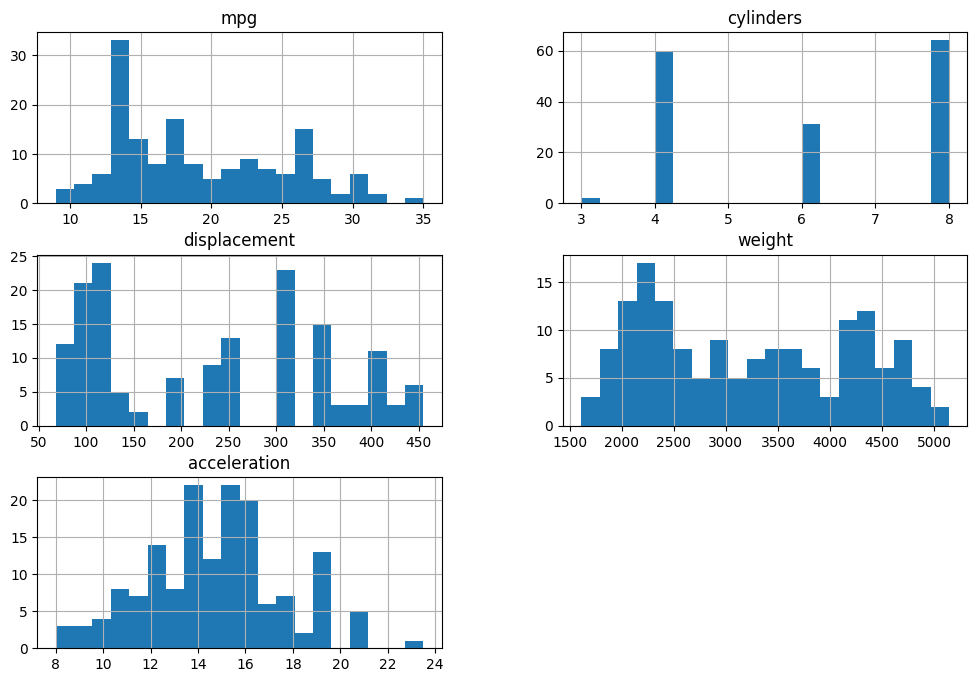

In [9]:
#Let's plot histogram on our data
df.hist(figsize=(12,8),bins=20)
plt.show()

> observation 

The weights are starting from 1700 to 5030

The milege is starting from 8 to 35

The accleration is starting from 8 to 23

The displacement is starting from 55 to 453

In [10]:
df

,mpg,cylinders,displacement,weight,acceleration
0,18.0,8,307.0,3504.0,12.0
1,15.0,8,350.0,3693.0,11.5
2,18.0,8,318.0,3436.0,11.0
3,16.0,8,304.0,3433.0,12.0
4,17.0,8,302.0,3449.0,10.5
...,...,...,...,...,...
152,19.0,6,225.0,3264.0,16.0
153,18.0,6,250.0,3459.0,16.0
154,15.0,6,250.0,3432.0,21.0
155,15.0,6,250.0,3158.0,19.5


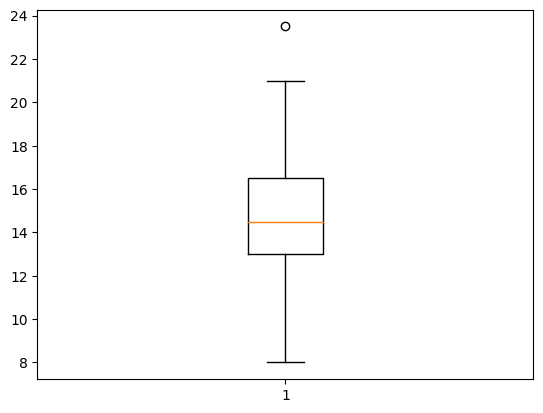

In [11]:
#we have found an outlier in acceleration . Therefore we are going to remove it
plt.boxplot(df["acceleration"])
plt.show()

In [12]:
df = df[(df['acceleration']<22.0)]
#Now we removed the outlier

In [13]:
x=df.drop("mpg",axis=1)
y=df["mpg"]
print(x.shape)
print(y.shape)

(156, 4)
(156,)


Let split the data into train and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
{column: len(x_train[column].unique()) for column in x_train.columns}

{'cylinders': 4, 'displacement': 41, 'weight': 107, 'acceleration': 24}

Standarization

In [16]:
scaler = StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

Checking how much our independent attributes are correlated to our target variable

In [17]:
df.corr()['mpg']

mpg             1.000000
cylinders      -0.869761
displacement   -0.882342
weight         -0.908323
acceleration    0.568335
Name: mpg, dtype: float64

Model building using this algorithms:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

In [18]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)

In [19]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.85752207, 0.53453696, 0.86190794, 0.72598535, 0.82773166])

In [20]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=22),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,20,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=3)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [21]:
perfect_model(x,y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'random', 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'absolute_error'}, {'n_estimators': 148, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}]


,model,best_score,best_params
0,Linear_Regression,0.729146,{}
1,Decision_Tree,0.668737,"{'splitter': 'random', 'min_samples_leaf': 5, ..."
2,Random_forest,0.716143,"{'n_estimators': 148, 'min_samples_split': 2, ..."


In [22]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.8663931586241653

In [23]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.8447467626193522

In [24]:
final_rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.8977805696565768

In [25]:
cross_val_score(LinearRegression(),x,y,).mean()

0.7705985205685737

In [26]:
cross_val_score( DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error'),x,y,cv=cv).mean()

0.7582042280345253

In [27]:
x_test

,cylinders,displacement,weight,acceleration
0,-1.188476,-1.077121,-1.241434,0.356549
1,-1.188476,-1.033647,-0.371135,0.007994
2,-1.188476,-1.398830,-1.335763,1.750766
3,-1.188476,-1.103206,-1.162827,-0.166283
4,-0.081263,0.087985,0.073559,0.356549
5,1.025949,0.966163,1.000007,-0.340560
6,-1.188476,-1.103206,-1.001119,0.182271
7,-1.188476,-1.146680,-0.993259,0.705103
8,-1.188476,-1.468388,-1.673776,1.576489
9,-1.188476,-1.303187,-1.297583,0.356549


In [28]:
final_rf_model.predict(x_test)

array([26.82587063, 21.38695476, 29.77007857, 24.28014652, 18.38429841,
       14.05741825, 24.14754206, 25.05458016, 30.3222881 , 28.13334286,
       30.5276619 , 26.63410548, 13.7671127 , 13.62471429, 13.9014381 ,
       14.14957857, 14.93504048, 21.62112381, 26.92266587, 27.08508405,
       28.26764683, 30.53215952, 24.69261501, 18.01232381, 13.96215476,
       13.09454286, 13.8600381 , 14.03669841, 21.36868333, 13.16181905,
       13.14636522, 12.44718333, 14.05105952, 18.60037857, 30.5893119 ,
       21.84162619, 17.54820079, 22.81104524, 22.45088095, 21.87759286,
       27.11935628, 12.10814264, 21.72856429, 22.45022381, 30.35124048,
       22.17041905, 14.3404881 ])

In [29]:
#let's find out mean square error, root mean square error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = final_rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Square Error: 4.40732794188728
Root Mean Square Error: 2.0993636992877818
Mean Absolute Error: 1.6541929265769688


- I got 90% accuracy for RanomForestRegressor model
- Therefore I am taking my final model as RandomForestRegressor

In [30]:
def prediction(cylinders,displacement,weight,acceleration):
    X_pred = np.zeros(4)
    X_pred[0]=cylinders
    X_pred[1]=displacement
    X_pred[2]=weight
    X_pred[3]=acceleration
    X_pred = scaler.transform([X_pred])
    prediction = final_lr_model.predict(X_pred)
    return prediction

In [31]:
prediction(8,120,3218,21)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.69330909])

In [32]:
#let's save the random forest regressor model and scaler in the form pickle file

import pickle
with open('milege_model.pkl','wb') as file:
    pickle.dump(final_rf_model,file)
    
with open("scaler_mpg.pickle","wb") as file:
    pickle.dump(scaler,file)